In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
url = 'https://pt.wikipedia.org/wiki/Lista_das_cidades_mais_populosas_do_mundo'
response = requests.get(url, headers = headers).content
soup = BeautifulSoup(response, 'html.parser')
table = soup.find_all('table', attrs = {'class':'sortable wikitable'})[0]

In [3]:
table

<table class="sortable wikitable" style="vertical-align:center; text-align:center; background:#FFFFF;">
<tbody><tr>
<th>Posição
</th>
<th>Cidade
</th>
<th>Imagem
</th>
<th>População
</th>
<th>Definição
</th>
<th>Área (km²)
</th>
<th>Densidade populacional (/km²)
</th>
<th>País
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Chongqing" title="Chongqing">Chongqing</a>
</td>
<td><a class="image" href="/wiki/Ficheiro:SkylineOfChongqing.jpg"><img alt="SkylineOfChongqing.jpg" data-file-height="1541" data-file-width="3870" decoding="async" height="50" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/125px-SkylineOfChongqing.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/188px-SkylineOfChongqing.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/39/SkylineOfChongqing.jpg/250px-SkylineOfChongqing.jpg 2x" width="125"/></a>
</td>
<td><span style="display:none">&amp;0000000030165500.000000</span>30 165 500<sup class="re

In [4]:
city = []
country = []
pop = []

for tr in table.tbody.find_all('tr'):
    column = tr.find_all('td')
    if len(column) == 0:
        continue
    city.append(tr.findAll('td')[1].a.get_text())
    country.append(tr.findAll('td')[7].a.get_text())
    parsed_population = 0
    try:
        population = tr.findAll('td')[3]
        parsed_population = int(float(population.span.text.replace("&","")))
    except:
        parsed_population = 0
    pop.append(parsed_population)

In [5]:
# city
print(len(city))

31


In [6]:
# Country
print(country)

['China', 'China', 'Nigéria', 'Paquistão', 'Turquia', 'Índia', 'Rússia', 'Brasil', 'China', 'China', 'Índia', 'China', 'Coreia do Sul', 'Indonésia', 'República Democrática do Congo', 'China', 'Japão', 'Índia', 'Egito', 'Bangladesh', 'México', 'Índia', 'Estados Unidos', 'Reino Unido', 'Tailândia', 'China', 'Irão', 'Colômbia', 'Vietnã', 'China', 'Iraque']


In [7]:
# POpulation
# print(pop)
# population = [valor for valor in pop]
# population = ["{:,}".format(valor) for valor in pop]
population = [valor for valor in pop]
print(population)

[30165500, 17836133, 16060307, 13969284, 0, 12478447, 12380664, 12106920, 11716620, 11185600, 11007835, 10467400, 10388055, 9988329, 9735000, 9341844, 9071577, 8981087, 8922949, 8906039, 8874724, 8425970, 8405837, 8308369, 8280925, 8220207, 8154051, 7776845, 7681700, 7219700, 7180889]


In [8]:
# To data Frame
country = ['China', 'China', 'Nigeria', 'Pakistan', 'Turkey', 'India', 'Russia', 'Brazil', 'China', 'China', 'India', 'China', 'Korea Africa','Indonesia','Democratic Republic of Congo','China','Japan','India','Egypt','Bangladesh','Mexico','India','United States','United Kingdom','Thailand','China','Iran','Colombia','Vietnam','China','Iraq']
len(city)
data = {'city': city, 'country': country, 'population': population}
data = pd.DataFrame(data)
data.head()

,city,country,population
0,Chongqing,China,30165500
1,Xangai,China,17836133
2,Lagos,Nigeria,16060307
3,Carachi,Pakistan,13969284
4,Istambul,Turkey,0


In [9]:
# Data Cleaning
# Preencher valor de Istambul
data = data.set_value(index = 4, col = 'population', value = 13907015)
data = data.set_value(index = 28, col = 'city', value = 'Ho Chi Minh')
# Congo
data = data.set_value(index = 14, col = 'country', value = 'Congo')
data

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,city,country,population
0,Chongqing,China,30165500
1,Xangai,China,17836133
2,Lagos,Nigeria,16060307
3,Carachi,Pakistan,13969284
4,Istambul,Turkey,13907015
5,Bombaim,India,12478447
6,Moscou,Russia,12380664
7,São Paulo,Brazil,12106920
8,Pequim,China,11716620
9,Cantão,China,11185600


In [10]:
# Export
data.to_csv(r'data/population.csv')

# Visualization

In [11]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
#reescale population number
# data = data.apply(lambda x: x*1e5 if x.name in ['population'] else x)
data.head()

,city,country,population
0,Chongqing,China,30165500
1,Xangai,China,17836133
2,Lagos,Nigeria,16060307
3,Carachi,Pakistan,13969284
4,Istambul,Turkey,13907015


In [13]:
# # Create Fig
# # data = data.groupby([['country']])['population'].median()
# fig, ax = plt.subplots(figsize=(16,10))
# sns.set()
# ax = sns.barplot("city", y="population", data=data,
#                  palette="Blues_d")

In [14]:
# # Matplolib
 
# # Create bars and choose color
# plt.bar("city", height="population", data=data, color = (0.5, 0.1, 0.5, 0.6))

# # # Add title and axis names
# plt.title('30 most populous cities')
# plt.xlabel('Cities')
# plt.ylabel('Population')
 
# # # Limits for the Y axis
# # plt.ylim(0,60)
 
# # # Create names
# plt.xticks("city", city)
 
# # # Show graphic
# plt.show

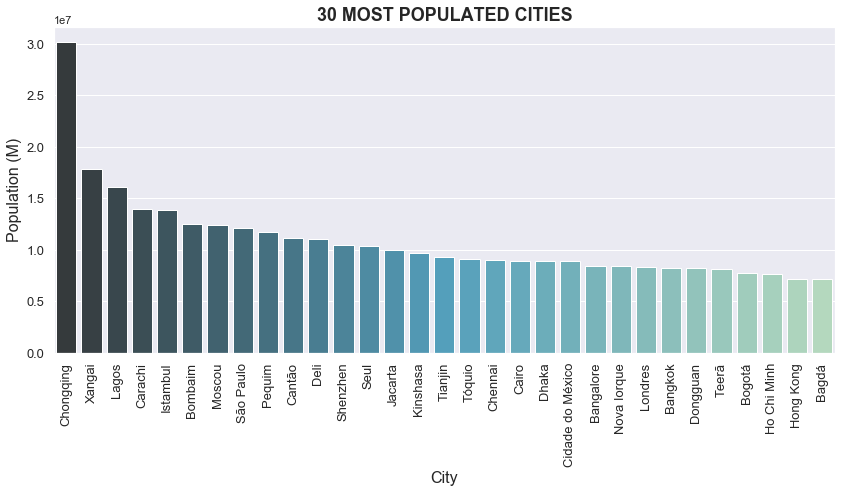

In [15]:
# Seaborn
sns.set()
# plt.style.use("dark_background")
# plt.figure(figsize=(14,6))




fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(x=data['city'], y=data['population'], palette = "GnBu_d", ax =axes)
plt.xticks(rotation= 90)
plt.xlabel('City', fontsize=16)
plt.ylabel('Population (M)', fontsize=16)
plt.title('30 most populated cities'.upper(), fontsize=18, fontweight='bold')

for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

# axes.legend(prop=dict(size=10))

# save
plt.savefig('data/population.png')

In [18]:
popul = pd.read_csv('data/population_filtered.csv')

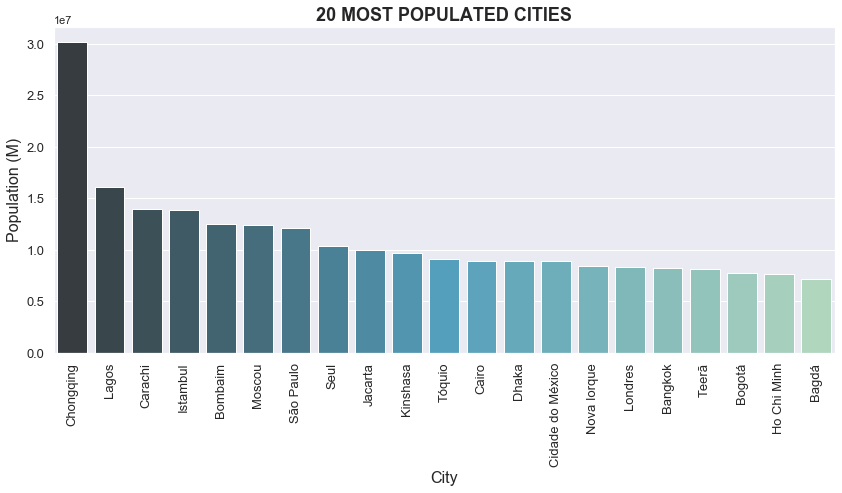

In [21]:
# # Seaborn
sns.set()
# plt.style.use("dark_background")
# plt.figure(figsize=(14,6))

fig, axes = plt.subplots(figsize=(14, 6))

sns.barplot(x=popul['city'], y=popul['population'], palette = "GnBu_d", ax =axes)
plt.xticks(rotation= 90)
plt.xlabel('City', fontsize=16)
plt.ylabel('Population (M)', fontsize=16)
plt.title('20 most populated cities'.upper(), fontsize=18, fontweight='bold')

for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)

# axes.legend(prop=dict(size=10))

# save
plt.savefig('data/population_20.png')